In [1]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Data Loading & Cleaning

In [2]:
csv_path = "results/controlled_results.csv"
df = run_load_clean_diagnose_data(csv_path)

⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
- Filtering rows to dominant 'total_generated_tokens' = 16384
- Retained 88 of 90 rows
- Dropped configs: ['batching_1', 'batching_2']
- Dropped row indices: [4, 5]
Original distribution:
total_generated_tokens
14659     1
16284     1
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ FLOPs value is constant: 16949970993152
Original distribution:
flops
16949970993152    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
✅ Total generated tokens value is constant: 16384
Original distribution:
total_generated_tokens
16384    88
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:515: UserWarning: ⚠️ Dropped 2 rows due to inconsistent 'total_generated_tokens' values
  df = filter_by_dominant_token_count(df)


In [3]:
cols_to_describe = [
    'total_energy_kwh',
    'total_inference_time_sec',
    'average_latency_ms_per_batch',
    'throughput_queries_per_sec',
    'throughput_tokens_per_sec',
    'cpu_energy_total',
    'gpu_energy_total',
    'flops_per_token',
    'energy_per_token_kwh',
    'divergence_energy_flops'
]

df[cols_to_describe].describe()

,total_energy_kwh,total_inference_time_sec,average_latency_ms_per_batch,throughput_queries_per_sec,throughput_tokens_per_sec,cpu_energy_total,gpu_energy_total,flops_per_token,energy_per_token_kwh,divergence_energy_flops
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,8.800000e+01,8.800000e+01,8.800000e+01
mean,0.021104,38.438732,4662.541943,3.573381,457.392832,0.004661,0.016412,1.034544e+09,1.288077e-06,1.245067e-15
std,0.005771,13.666694,558.983884,1.217770,155.874513,0.001752,0.004104,0.000000e+00,3.522471e-07,3.404853e-16
min,0.003973,9.628563,2868.194596,0.867697,111.065177,0.001194,0.002724,1.034544e+09,2.425090e-07,2.344114e-16
25%,0.021053,36.740853,4593.879790,3.428112,438.798308,0.004547,0.016461,1.034544e+09,1.284950e-06,1.242045e-15
50%,0.021162,37.063840,4633.730808,3.453501,442.048106,0.004574,0.016542,1.034544e+09,1.291647e-06,1.248518e-15
75%,0.021235,37.338340,4667.292441,3.483860,445.934128,0.004598,0.016604,1.034544e+09,1.296080e-06,1.252803e-15
max,0.064102,147.516985,9029.341061,13.293780,1701.603812,0.018196,0.045785,1.034544e+09,3.912481e-06,3.781841e-15


# Exploratory Data Analysis (EDA)

📊 Plotting histogram...


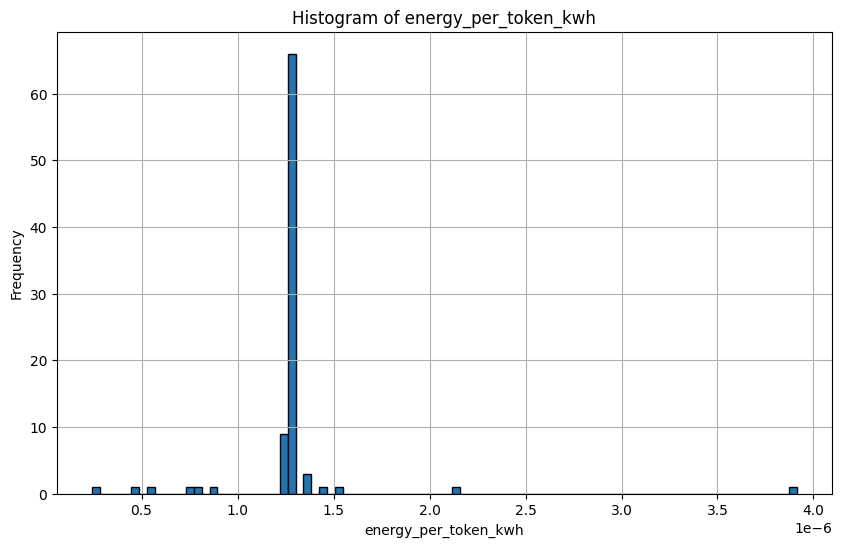

📦 Plotting boxplot...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:28: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  plt.xlabel(x_column)


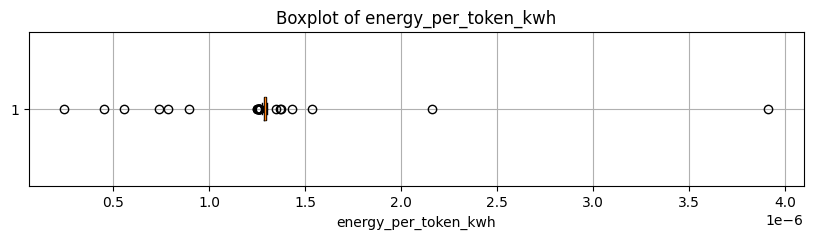

🔬 Scatter: Energy vs FLOPs...


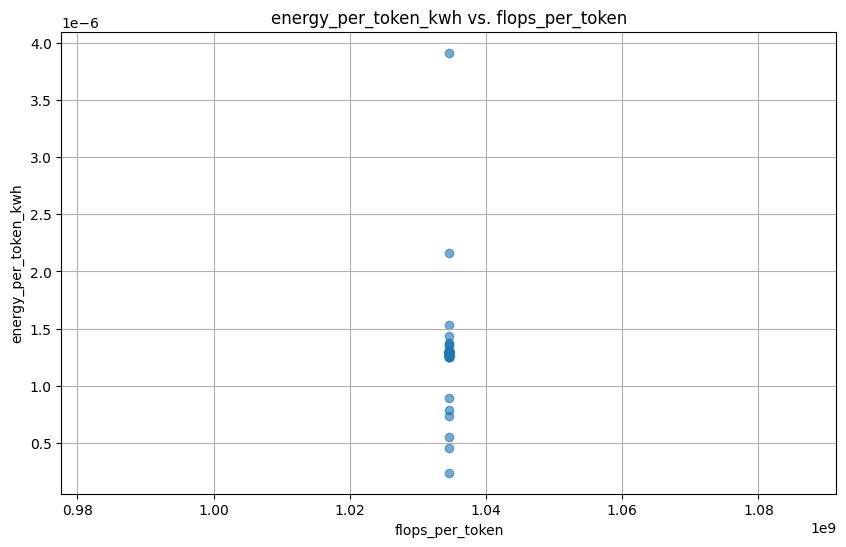

📈 Scatter: Divergence vs Batch Size...


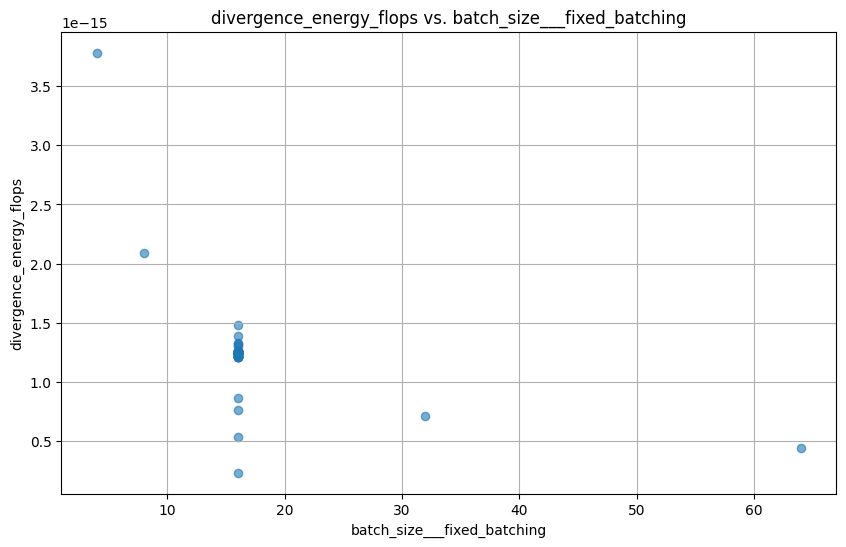

🔗 Correlation matrix...


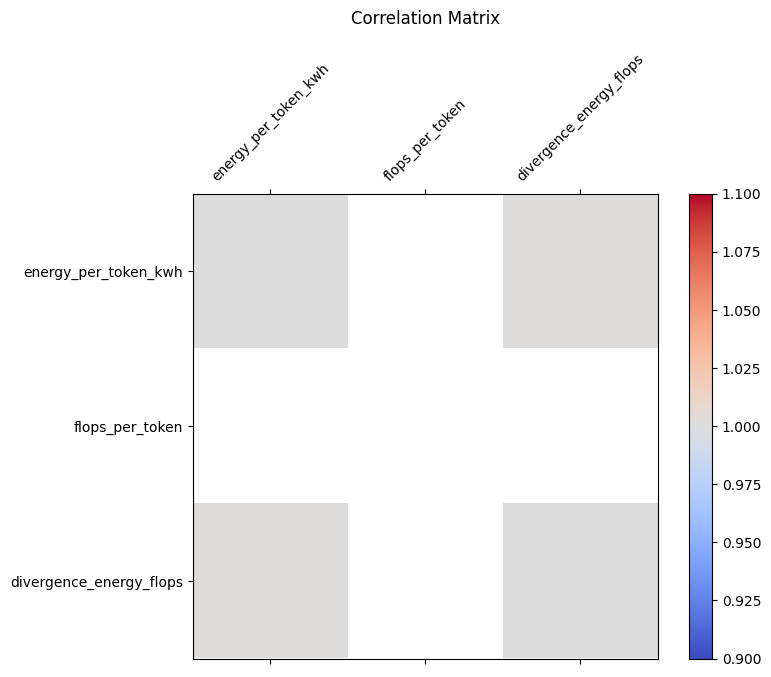

In [30]:
from scripts.b_exploratory_data_analysis import (
    plot_histogram,
    plot_boxplot,
    plot_scatter,
    plot_divergence,
    plot_correlation_matrix,
    plot_all_diagnostics
)

plot_all_diagnostics(df)

To do: 
- [ ] crop outliers temporarily -> look at closer grouped in more detail
- [ ] also plot more 

# Controlled Experiment Visualisation

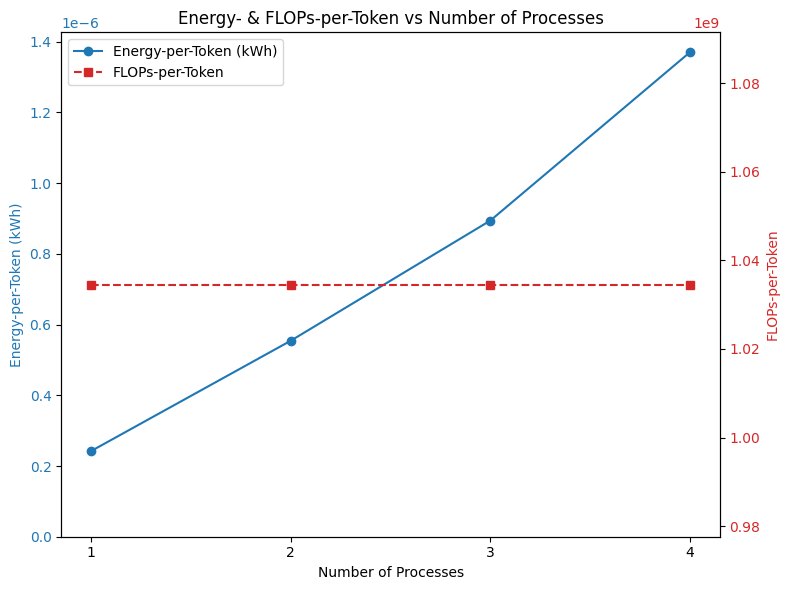

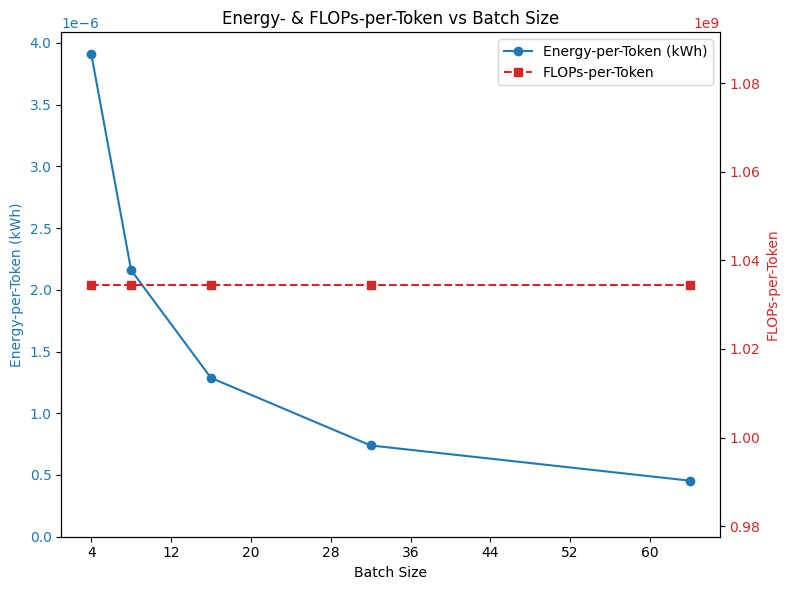

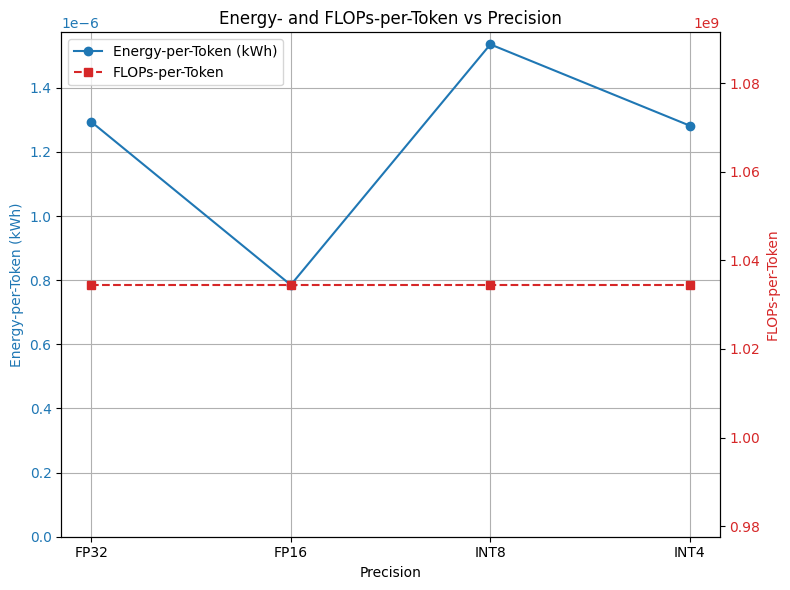

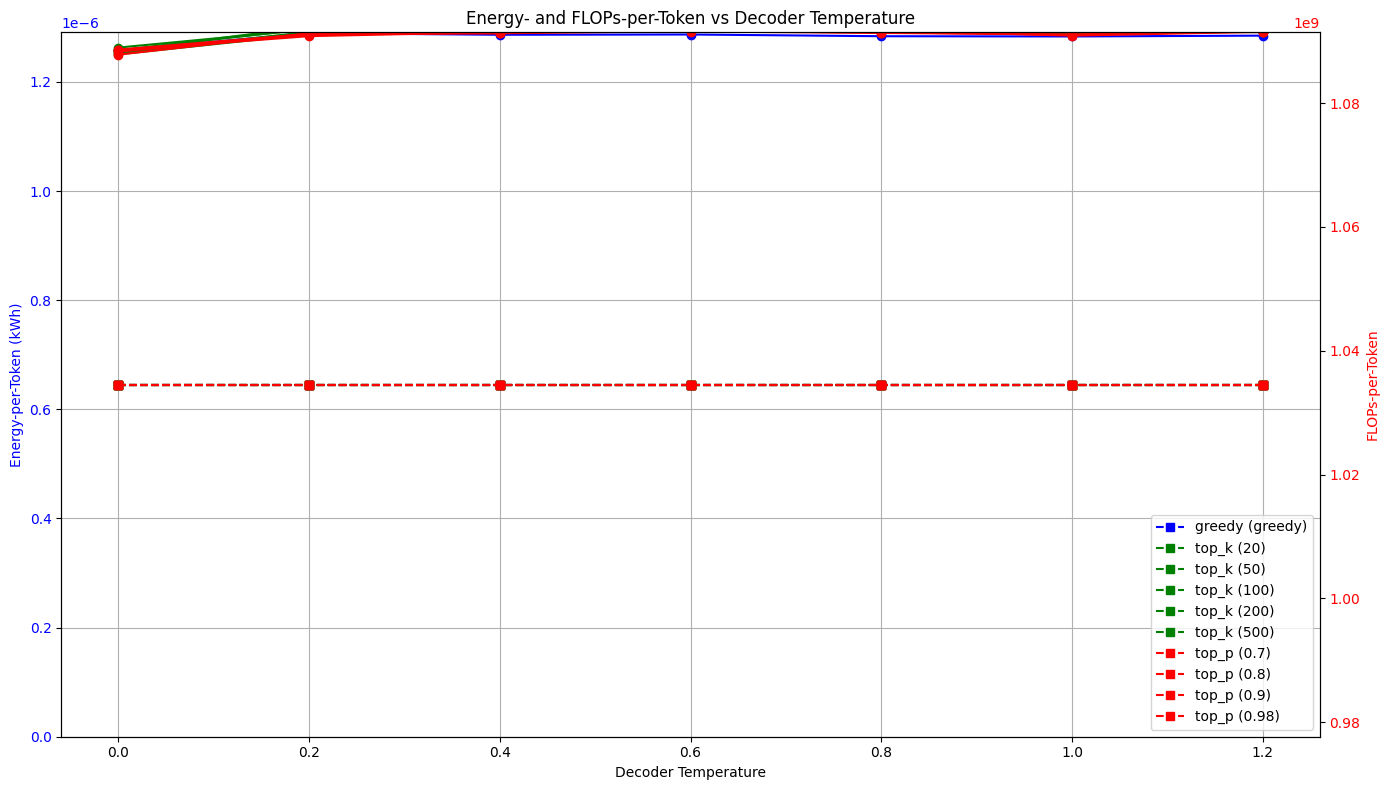

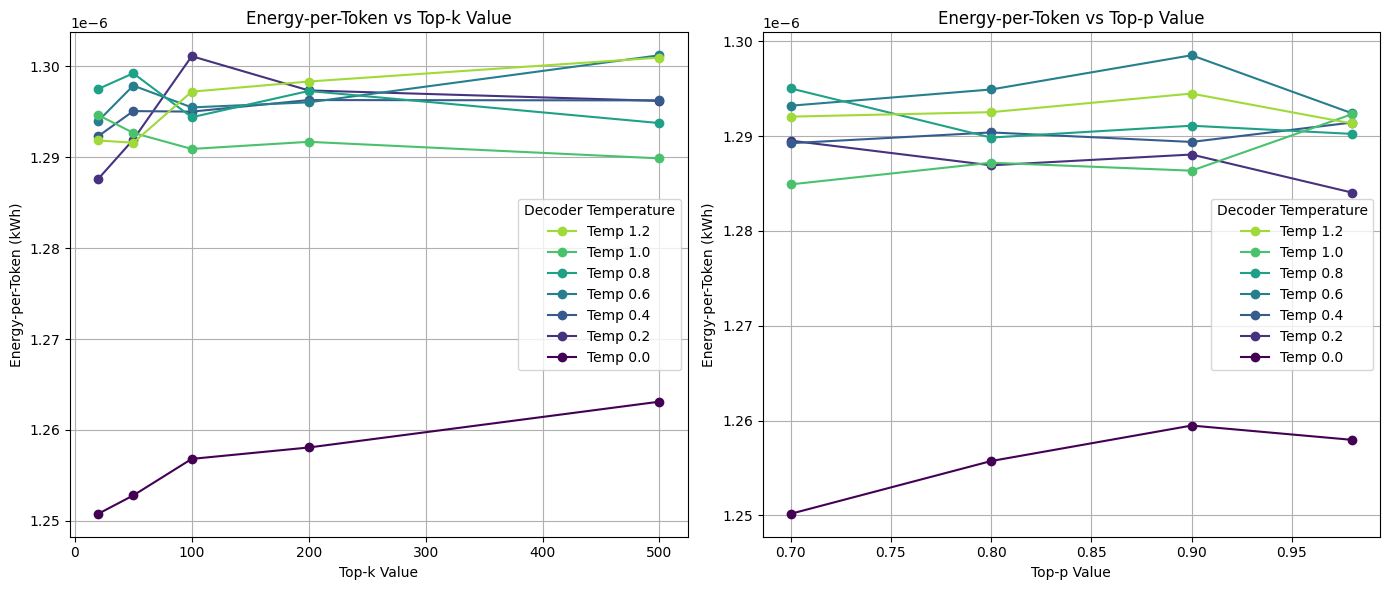

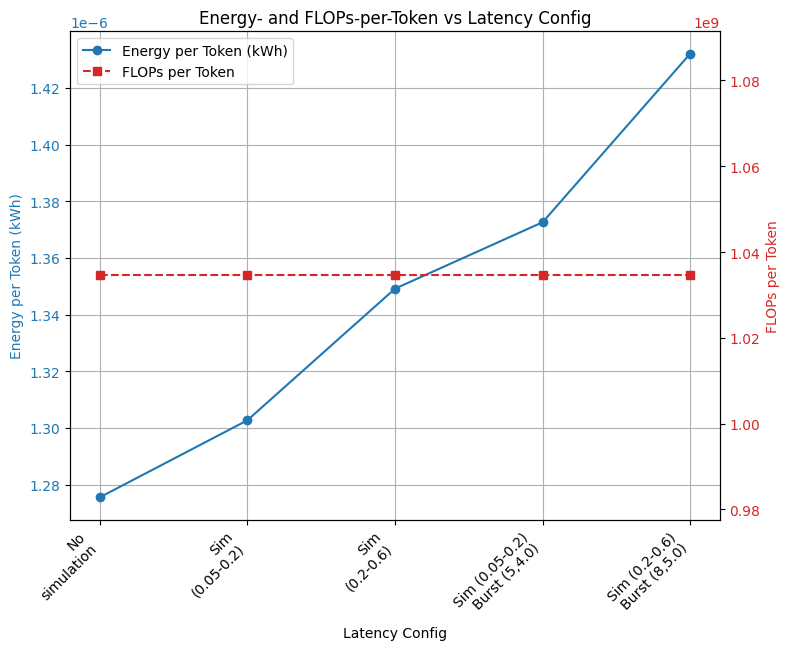

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:413: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  energy_pivot = latency_df.pivot_table(
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:419: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flops_pivot = latency_df.pivot_table(


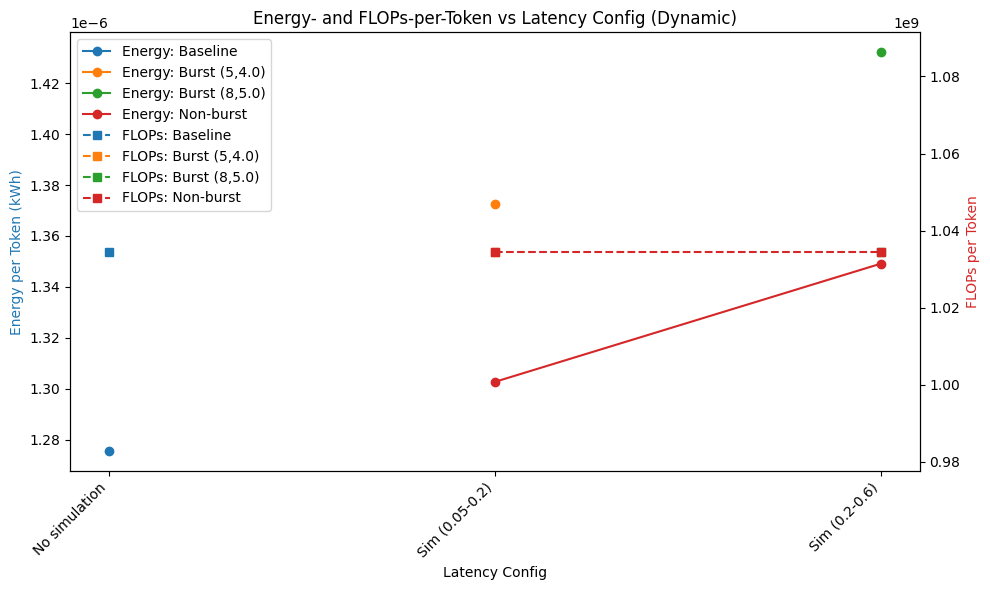

In [28]:
from scripts.c_controlled_exp_visualisations import (
    plot_num_processes,
    plot_batching,
    plot_precision,
    plot_decoder_temperature,
    plot_decoder_topk_top_p,
    plot_latency,
    plot_latency_dynamic,
    plot_all_vizs,
)

configs = ['num_processes', 'batching','precis', 'decoding', 'latency']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}

plot_all_vizs(dfs)

to do:
- [ ] don't treat no simulation and simulation as categorically distinct, rather they are on a continuous number line, and the plots should reflect that
- [ ] get FLOPs to print just once, and the legend to only be taken from one axis 
- PRINT WITH NORMALISED AXIS!!!! - Plot the values as a percent of the mean to visualise their relative spread

TO DO: WORK OUT % OF TOTAL ENERGY CONSUMPTION / VARIANCE THAT CAN BE EXPLAINED BY TOTAL CONFIGS CHANGES VS BASELINE THAT IS MODEL DETERMINED

# Modeling


📊 Running OLS regression for energy_per_token_kwh...

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.462
Model:                              OLS   Adj. R-squared:                  0.436
Method:                   Least Squares   F-statistic:                     17.80
Date:                  Wed, 16 Apr 2025   Prob (F-statistic):           1.38e-10
Time:                          17:45:48   Log-Likelihood:                 1210.5
No. Observations:                    88   AIC:                            -2411.
Df Residuals:                        83   BIC:                            -2399.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

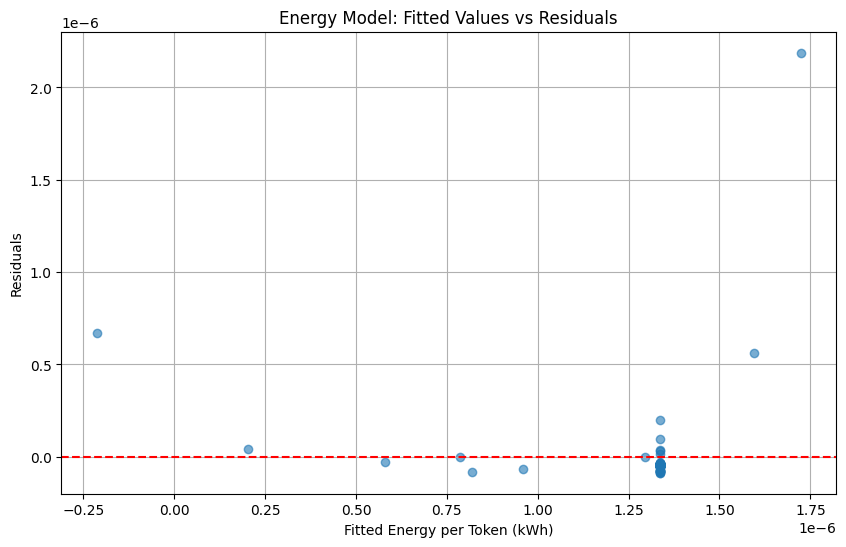


📊 Running OLS regression for energy_per_token_kwh...

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.282
Model:                              OLS   Adj. R-squared:                  0.257
Method:                   Least Squares   F-statistic:                     11.01
Date:                  Wed, 16 Apr 2025   Prob (F-statistic):           3.61e-06
Time:                          17:45:48   Log-Likelihood:                 1197.8
No. Observations:                    88   AIC:                            -2388.
Df Residuals:                        84   BIC:                            -2378.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

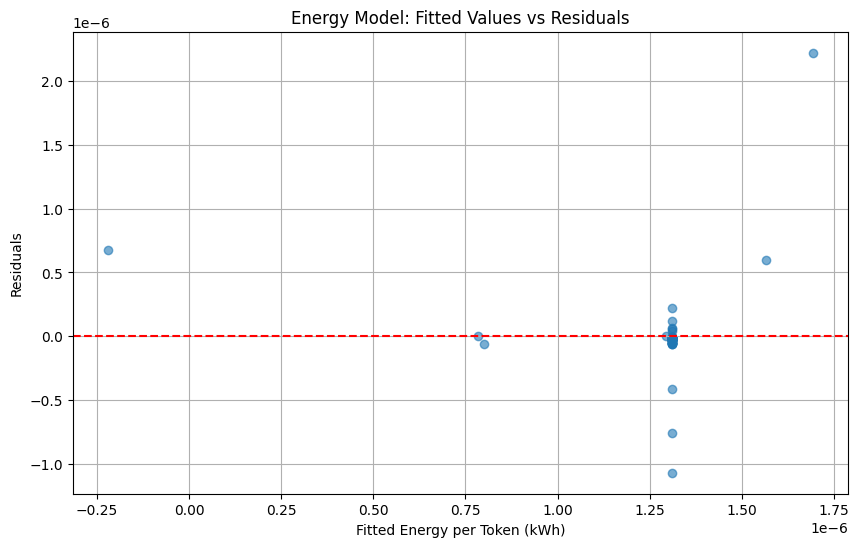

In [35]:
from scripts.d_base_regression import run_full_regression_analysis, preprocess_data

df = preprocess_data(df)

# With default predictors
run_full_regression_analysis(df)

# With custom predictors
custom_predictors = ["batch_size_numeric", "C(fp_precision)", "C(quantization)"]
run_full_regression_analysis(df, predictors=custom_predictors)


In [ ]:
%run scripts/d_mixed_effects_model.py

ImportError: cannot import name 'df_controlled_cleaned' from 'scripts.a_data_loading_cleaning' (/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py)

In [36]:
df['energy_per_token_kwh'].max() -  df['energy_per_token_kwh'].min() 

np.float64(3.6699724210452458e-06)

To do
- [ ] identify groupings:
   - [ ] use model (even though currently only one model)
   - [ ] use config_name and date_time
   - [ ] use decoder configs
   - [ ] latency configs 